In [31]:
# Run optimization from the command line: 
# Make sure the command line program: "optimize" is a PATH variable of current shell
# In your terminal,[username]$ which optimize

In [32]:
# Request the resources using slurm 
# srun  -n 2 -t 10:00:00 --x11=first --pty /bin/bash  -l

In [33]:
# See what the input file looks like
text_file = open("in_obj")
file_content = text_file.read()
print(file_content)
text_file.close()

# units: 

real   

# objective function defined: 

force mW_300K_1bar_500 1 2 2 bf 5000 eng abs w 0.0 1.0 

# sampling command  # sampling input file names:  in.force, in.rdf, in.isobar
# sampling by default is LAMMPS 

module load intel && srun -n %d -N1 -c1 --mpi=pmi2 lmp_ml_water < in.%s

# output frequency: current best parameters/obj, restart simplex  

5 5 

#stillinger_weber 6.189  2.3925  1.80  23.15  1.20  -0.333333333333 7.049556277  0.6022245584  4.0  0.0 0.0  
stillinger_weber 6.589  2.0925  1.87  29.15  1.02  -0.303333333333 7.049556277  0.6822245584  3.2  0.4 0.0  

# fit (1) and fix (0) parameters: 

1 1 1 1 1 1 0 1 1 1 0  

# constraints (index lower upper)  ... ): 

10 0 5

# set termination criterion: max number of iteration, tolerance for parameters,tolerance for objective 

25000 1e-14 1e-14

# create (Perturb) or use existing vertices (Restart): 

Nelder-Mead Perturb random 0.4  




In [34]:
# Run following command:
# '-c': the number of cores assigned by slurm 
# '-j': The job name
# "-i": input file name
# '-Ref': takes the folder address of reference data
# '-prep': takes the folder address of prepsystem data 

optimize -c 2 -j force_matching_tutorial_cmd -i in_obj -Ref ../../ReferenceData -prep ../../prepsystem

# Wait for ~ 2-3 hours...
# No output from the programs
# Check either the log file or error file generated by slurm

In [35]:
import numpy as np  
import matplotlib.pyplot as plt 

In [36]:
output_freq  = 5
Fm_only = np.loadtxt("force_matching_tutorial/Output/best_objective.txt")

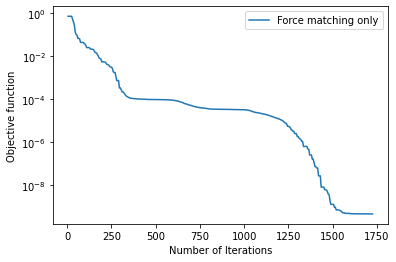

In [37]:
Fm_only_itera = np.arange(1,Fm_only.size+1)
plt.semilogy(Fm_only_itera*output_freq,Fm_only,label="Force matching only")
plt.xlabel("Number of Iterations")
plt.ylabel("Objective function")
plt.legend(loc="upper right")
plt.show()